In [ ]:
import csv
import os

import biosppy.signals.ecg as ecg
import biosppy
import neurokit2 as nk

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

from func_extractor import *

In [3]:
X_train_raw = pd.read_csv('../Data/Input/train.csv', index_col='id')
X_test_raw = pd.read_csv('../Data/Input/test.csv', index_col='id')
y_train_raw = X_train_raw.iloc[:, [0]]

In [4]:
X_train_raw

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
id,,,,,,,,,,,,,,,,,,,,,
0,0,-13,-9,-6,-4,0,2,6,12,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,-34,110,249,390,527,639,721,777,823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,-34,-36,-37,-39,-41,-42,-44,-46,-48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,292,298,303,310,320,336,354,377,405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,157,179,195,210,217,222,226,228,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,3,-247,-271,-285,-303,-334,-376,-413,-432,-443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5113,0,62,62,61,61,61,61,61,61,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,0,-95,-110,-124,-131,-126,-114,-95,-67,-42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X_train_raw = X_train_raw.iloc[:, 1:]

d:\anaconda3\envs\task2\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


Text(0.5, 1.0, 'FFT of full signal')

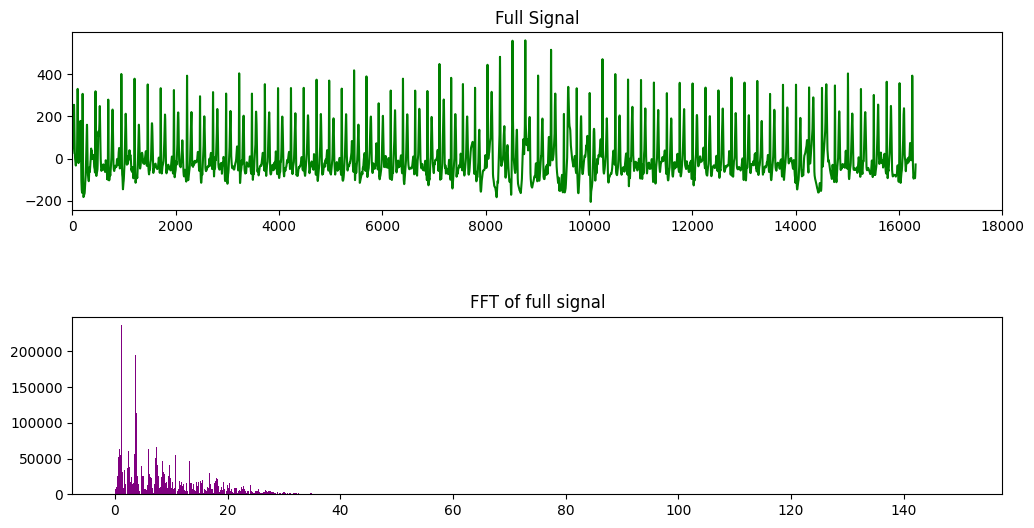

In [8]:
# Test Fourier
signal = X_train_raw.iloc[0].dropna().to_numpy(dtype='float32')
try:
    clean_signal = nk.ecg_clean(signal, sampling_rate=300, method='neurokit')
except:
    try:
        clean_signal = nk.ecg_clean(signal, sampling_rate=300, method='hamilton2002')
    except:
        try:
            clean_signal = nk.ecg_clean(signal, sampling_rate=300, method='elgendi2010')
        except:
            print(f'Fail')
            
ff = extract_fft_heartbeat(heartbeat=clean_signal)
test = extract_fft_feature(clean_signal = clean_signal)
n = 8000
fourier_specture = fft(clean_signal)
fft_freq = sf.fftfreq(len(fourier_specture)) * 300
fourier_specture = fourier_specture[fft_freq >= 0]
fft_freq = fft_freq[fft_freq >= 0]
fft_mask = fourier_specture > np.quantile(fourier_specture,0.9)
fourier_specture = np.multiply(fourier_specture, fft_mask)
    
fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(np.arange(len(clean_signal)), clean_signal[0:], color = 'green')
full_signal.set_xlim(0,18000)
full_signal.set_title('Full Signal')
fft_comp.bar(fft_freq, list(fourier_specture), 0.1, color = 'purple')
fft_comp.set_title('FFT of full signal')

In [9]:
signal = X_train_raw.iloc[0].dropna().to_numpy(dtype='float32')
meth = "hand"
cleaned_signal = nk.ecg_clean(signal, sampling_rate=300, method='neurokit')
ecg_data = extract_ecg_data(cleaned_signal, meth)
fft_data = extract_fft_feature(clean_signal)

In [ ]:
features = multi_features(X_train_raw)
features.to_csv('train_features.csv')
features = pd.read_csv('train_features.csv', index_col=0)

In [ ]:
# Create test features
test_features = multi_features(X_test_raw)
test_features.to_csv('test_features.csv')